In [1]:
import numpy as np
import pandas as pd
import json
import ndjson
import csv
%config IPcompleter.greedy = True


In [2]:
def read_data(filename):
    
    """ read in data for analysis
        This function will return a pandafram from ndjson data
        inputs: ndjson data
        returns: pandaframe
    
    """
    
    data_list = []
    with open(filename) as f:         # read ndjson data
        datastore = ndjson.load(f)
    for i in datastore:
        dataFinal = i.values()
        data_list.append(dataFinal)   # convert the data files into an array
    df = pd.DataFrame([data_list]).T  # convert the data to panda a frame
    df[['x','y']] = pd.DataFrame(df[0].values.tolist(), index = df.index) # clean data
    df = df.drop(columns = 0)

    return df

df = read_data('data.ndjson')  # run the read_data function
df.head()


,x,y
0,10.584227,23.446823
1,14.867693,45.228094
2,8.118707,24.939492
3,13.071239,35.450344
4,2.306874,-1.834100


In [3]:
df.describe() # summary of the data

,x,y
count,15000.000000,15000.000000
mean,9.872282,23.404137
std,4.110319,15.251282
min,-2.138749,-2.995863
25%,6.789843,10.262563
50%,9.728282,23.643079
75%,12.583935,36.382296
max,27.498231,49.995394


In [4]:
print('number of observations: ', df.shape[0])
print('number of columns: ', df.shape[1])

('number of observations: ', 15000)
('number of columns: ', 2)


In [84]:
print(df.isnull().sum())
print(df['x'] == 0).sum()

x    0
y    0
dtype: int64
0


In [6]:
df.isnull().sum()

x    0
y    0
dtype: int64

# Dealing with missing values

### Impute using fillna

In [11]:
pima_dataset = pd.read_csv('pima-indians-diabetes.csv', header = None)
pima_dataset.head()
list(pima_dataset)
df = pima_dataset

In [35]:
pima_dataset.describe() # detect missing values or weird 0 values
df.isnull().sum()
(df[[1,2,3,4]]==0).sum()
df.replace(0,np.nan)
df.fillna('ffill', inplace = True)
df2 = df[list(df)].replace(0,np.nan)
df2.fillna(np.mean, inplace= True)

In [87]:
print(pima_dataset.isnull().sum())  # count missing values
print((pima_dataset[[1,2,3,4]] == 0).sum())

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64
1      5
2     35
3    227
4    374
dtype: int64


In [88]:
pima_dataset.replace(0,np.nan).head()  # replace all 0  with nan
 

,0,1,2,3,4,5,6,7,8
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,NaN
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,NaN
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0


In [89]:
pima_dataset.fillna(0, inplace = True) # replace missing values by zero
pima_dataset.fillna(pima_dataset.mean(), inplace = True) # replace by mean
pima_dataset.fillna(method ='ffill')
pima_dataset.fillna(method ='bfill')
pima_dataset.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### impute missing values using sklearn

In [41]:
%config IPcompleter.greedy == True
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

 

X = pima_dataset.iloc[:,0:8]
y = pima_dataset.iloc[:,8]
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3)

model = LogisticRegression()
imp = Imputer(missing_values ='NaN', strategy = 'mean', axis = 0)
# or
#X_new  = imp.fit_transform(x)

steps = [('imputation', imp), ('logistreg', model)]

pipline = Pipeline(steps)
pipline.fit(X_train,y_train)
y_pred = pipline.predict(X_test)
score = pipline.score(X_test,y_test)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


# Correlation

In [42]:
import seaborn as sn
import matplotlib as pyplot
pima_dataset.corr()
sn.heatmap(pima_dataset.corr())
sn.heatmap(df.corr())

In [92]:
covariance = np.cov(df['x'],df['y'])
pearson_cor = np.cov(df['x'],df['y']) / (np.std(df['x']) * np.std(df['y']))

### Columns with high correlation

In [93]:
np.random.seed([3,1415])
data = pd.DataFrame(
    np.random.randint(10, size=(10, 10)),
    columns=list('ABCDEFGHIJ'))

corr_matrix = data.corr().abs()
high_corr_var = np.where(corr_matrix > 0.8)
s = corr_matrix.unstack()
so = s.sort_values(kind="quicksort")


In [60]:
c = df.corr().abs()
hc =np.where(c>0.8)
indices = [(df.indices[i], df.columns[j]) for i,j in zip(*hc) if i<j and i!=j]

In [94]:
indices = [(data.index[x], data.columns[y]) for x, y in zip(*high_corr_var) if x != y and x < y]
indices

[(4, 'J')]

# Feature Distributions

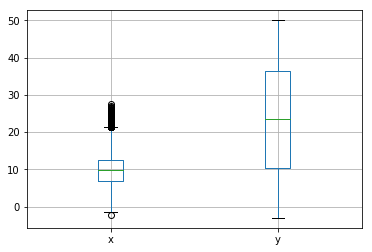

In [95]:
def normalization(data):
    mean = np.mean(data, axis = 0)
    std = np.std(data, axis = 0)
    zscore = (data - mean)/ std
    return zscore

df.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f8e3090>,
      dtype=object)

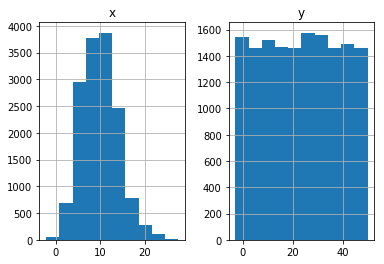

In [96]:
df.hist()

# Feature Engineering

In [97]:
from sklearn.preprocessing import PolynomialFeatures

def AddFeatures(data):
    poly = PolynomialFeatures(degree = 3, include_bias = False)
    X = df['x']
    X = np.array(X).reshape(-1,1)
    X_transform = poly.fit_transform(X)
    X_transform = pd.DataFrame(X_transform)
    return X_transform

df_transform = AddFeatures(df['x'])
dfCopy = df.copy()
dfCopy[['x1','x2','x3']] = df_transform
dfCopy = dfCopy.drop(columns = 'x')
dfCopy.head()

,y,x1,x2,x3
0,23.446823,10.584227,112.025857,1185.707073
1,45.228094,14.867693,221.048283,3286.477910
2,24.939492,8.118707,65.913399,535.131557
3,35.450344,13.071239,170.857282,2233.316327
4,-1.834100,2.306874,5.321666,12.276411


In [127]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
from xgboost.sklearn import XGBRegressor

# ------------------------ After adding features

x = dfCopy.iloc[:,1:]
y = dfCopy.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 990)

#model = LinearRegression()
model = XGBRegressor(colsample_bytree=0.9,
                 gamma=0,                 
                 learning_rate=0.7,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 
model.fit(X_train,y_train)
yhat = model.predict(X_test)
accuracy = r2_score(y_test,yhat)
print('accuracy is: ','%.2f' % accuracy)
#plt.scatter(y_test,yhat)
#plt.plot(X_test, yhat, color='r')
#plt.show()

# ------------------------ Before adding features

x1 = df.iloc[:,0]
y1 = df.iloc[:,1]
X_train, X_test, y_train, y_test = train_test_split(x1,y1, test_size = 0.2, random_state = 990)
np.array(X_train).reshape(-1,1)
model2 = LinearRegression()
model2.fit(np.array(X_train).reshape(-1,1),y_train)
#Where yhat is the estimated outcome or prediction made 
#by the trained model for the given input data X.
# By definition, it is an estimate or an approximation and contains some uncertainty.
yhat = model2.predict(np.array(X_test).reshape(-1,1)) 

accuracy = r2_score(y_test,yhat)
print('accuracy is: ','%.2f' % accuracy)
# The uncertainty comes from the errors in the model itself and noise in 
#the input data. The model is an approximation of the relationship between the input
#variables and the output variables.Given the process used to choose and tune the model, 
#it will be the best approximation made given available information, but it will still make errors. 
#Data from the domain will naturally obscure the underlying and unknown relationship between the input 
#and output variables. This will make it a challenge 
#to fit the model, and will also make it a challenge for a fit model to make predictions.

# A prediction interval is a quantification of the uncertainty on a prediction.

#plt.scatter(y_test,yhat)
#plt.plot(X_test, yhat, color='r')
#plt.show()
 

('accuracy is: ', '0.29')
('accuracy is: ', '0.53')


# Learning curver for training samples (m)

In [99]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(LinearRegression(), 
                                                        x, 
                                                        y,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='r2',
                                                        train_sizes=np.linspace(0.01, 1.0, 50))
    
    # Create means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis = 1)
    train_std = np.std(test_scores, axis =1)
    test_mean = np.mean(test_scores, axis =1)
    test_std = np.std(test_scores, axis = 1)
    plt.plot(train_sizes, train_mean,'o-', color="r", label= "Training score")
    plt.plot(train_sizes, test_mean,'o-', color="g", label="Test score")
    
    plt.title('learning curve')
    plt.xlabel('Training sample size')
    plt.ylabel('score')
    plt.legend(loc="best")
 
    plt.show()
    
    return plt
    
    

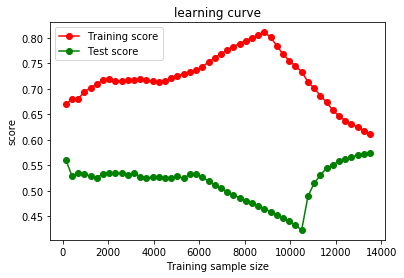

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

In [100]:
plot_learning_curve(LinearRegression(), x, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5))

In [101]:
from scipy.stats import linregress
%config IPcomplete.greedy =True

# Confidence Interval Manual

Prediction Interval: 20.344


10.230369524648562

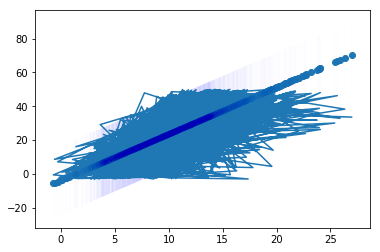

In [129]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(yhat,y_test) 
stdev = np.sqrt(MSE)
# calculate prediction interval
interval = 1.96 * stdev
print('Prediction Interval: %.3f' % interval)
lower, upper = yhat - interval, yhat + interval
plt.errorbar(X_test, yhat, yerr=interval , color='b', fmt='o', alpha= 0.004)
plt.scatter(X_test,yhat)
plt.plot(X_test,y_test)
MSE
stdev = np.sqrt(sum((yhat - y_test)**2) / (len(y_test) - 2))
stdev
yhat = model2.predict(np.array(X_train).reshape(-1,1))
stdev = np.sqrt(sum((yhat - y_train)**2) / (len(y_train) - 2))
stdev




plt.scatter(X_train.iloc[0:100],y_train.iloc[0:100]) # original data
plt.plot(X_test, yhat, color='red') # fit >  line > yhat and xtest
plt.errorbar(X_test, yhat, yerr=interval, color='b', fmt='o', alpha= 0.004)
plt.show()

# One-Hot Encoding in Scikit-learn

### LabelEncoder object: discritizing the categorical features

In [4]:
data = pd.read_csv('titanic_data.csv')
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [11]:
X = data.select_dtypes(include=[object])
X.head(3)

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S


In [8]:
%config IPcompleter.greedy = True

In [23]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

# apply to all the columns

X2 = X.apply(enc.fit_transform)
X2.head()

,Name,Sex,Ticket,Cabin,Embarked
0,108,1,523,0,3
1,190,0,596,82,1
2,353,0,669,0,3
3,272,0,49,56,3
4,15,1,472,0,3


In [49]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
encode = OneHotEncoder()
encode.fit(X2)
encode.transform(X2).toarray()

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [8]:
"""

select columns  # what you wanna show as column
from table
where column = vaiable  # filter row
groupby column  # show only that specific group
having sth #sth about the column




"""
        
        
        
            
    

'\n\nselect columns  # what you wanna show as column\nfrom table\nwhere column = vaiable\ngroupby column\n\n\n\n\n'

In [1]:
 

A few notes:
You're free to do the analysis as you like, but explain (via markdown) your choices.
Use whatever technique to create a Confidence Interval that you find appropriate. As above, explain your choice within the markdown.
Have a function that retuns an answer in the format of the get_prediction_and_interval function
At the end, plot the best prediction of "y" given "x" for with "best" prediction of "y" with 68%, 95%, and 99% intervals.
Feel free to direct any questions to shane@zume.com and/or nick.kypreos@zumepizza.com.

SyntaxError: invalid syntax (<ipython-input-1-774cda92d226>, line 1)

In [2]:
def read_data(filename='data.ndjson'):
    """read in data for analysis"""
    pass

In [3]:
def get_prediction_and_interval(x, conf):
    """
    inputs:
        x: float data input
        conf: level of confidence for prediction
    returns: dictionary of prediction
    """
    stub = {
        'pred': 0,
        'lower': 0,
        'upper': 0,
        'conf': conf
    }
    
    return stub

In [50]:
class LRPI:
    def __init__(self, normalize=False, n_jobs=1, t_value = 2.13144955):
        self.normalize = normalize
        self.n_jobs = n_jobs
        self.LR = linear_model.LinearRegression(normalize=self.normalize, n_jobs= self.n_jobs)
        self.t_value = t_value
        
    def fit(self, X_train, y_train):
        self.X_train = pd.DataFrame(X_train.values)
        self.y_train = pd.DataFrame(y_train.values)
        
        self.LR.fit(self.X_train, self.y_train)
        X_train_fit = self.LR.predict(self.X_train)
        self.MSE = np.power(self.y_train.subtract(X_train_fit), 2).sum(axis=0) / (self.X_train.shape[0] - self.X_train.shape[1] - 1)
        self.X_train.loc[:, 'const_one'] = 1
        self.XTX_inv = np.linalg.inv(np.dot(np.transpose(self.X_train.values) , self.X_train.values))
        
    def predict(self, X_test):
        self.X_test = pd.DataFrame(X_test.values)
        self.pred = self.LR.predict(self.X_test)
        self.X_test.loc[: , 'const_one'] =1
        SE = [np.dot(np.transpose(self.X_test.values[i]) , np.dot(self.XTX_inv, self.X_test.values[i]) ) for i in range(len(self.X_test)) ]
        results = pd.DataFrame(self.pred , columns=['Pred'])
        
        results.loc[:,"lower"] = results['Pred'].subtract((self.t_value)* (np.sqrt(self.MSE.values + np.multiply(SE,self.MSE.values) )),  axis=0)
        results.loc[:,"upper"] = results['Pred'].add((self.t_value)* (np.sqrt(self.MSE.values + np.multiply(SE,self.MSE.values) )),  axis=0)
        
        return results

In [59]:

from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from __future__ import division
df = read_data('data.ndjson')  # run the read_data function
target = df['y']
data = df['x']
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3)
model = LRPI()
model.fit(X_train, y_train)
results = model.predict(X_test)
results.head(10)

,Pred,lower,upper
0,0.449275,-0.325345,1.223895
1,0.530875,-0.249788,1.311538
2,0.600283,-0.176486,1.377052
3,0.310176,-0.470416,1.090769
4,0.666519,-0.114736,1.447774
5,0.470171,-0.300774,1.241117
6,0.721696,-0.064622,1.508013
7,0.178563,-0.593810,0.950937
8,1.086243,0.303525,1.868960
9,0.672375,-0.125384,1.470133


In [63]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(results['Pred'],y_test) 
stdev = np.sqrt(MSE)
# calculate prediction interval
interval = 1.96 * stdev
print('Prediction Interval: %.3f' % interval)
 

Prediction Interval: 0.833


In [66]:
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)
x.shape

(20,)